## Classification on MNIST Data (Images of Handwritten Digits)

In [ ]:
!pip install -q protobuf==3.20.*


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist

### Load Data

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Train images:", x_train.shape)
print("Test images:", x_test.shape)


Train images: (60000, 28, 28)
Test images: (10000, 28, 28)


###  **Visualize Sample Images**

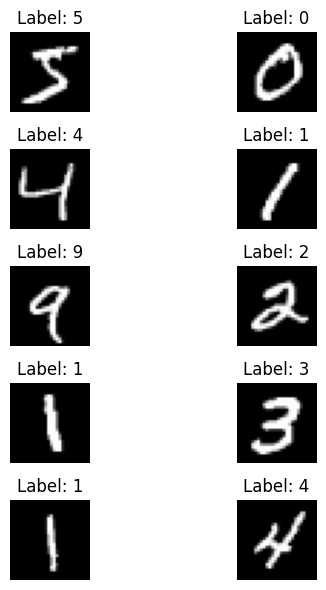

In [7]:
plt.figure(figsize=(6,6))
for i in range(10):
    plt.subplot(5, 2, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## **Train / Validation Split**

In [8]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.25,
    random_state=42
)

print("Training set:", x_train.shape)
print("Validation set:", x_val.shape)


Training set: (45000, 28, 28)
Validation set: (15000, 28, 28)


## **Reshape & Normalize**

In [9]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_val   = x_val.reshape(x_val.shape[0], -1) / 255.0
x_test  = x_test.reshape(x_test.shape[0], -1) / 255.0

print("After reshape:", x_train.shape)


After reshape: (45000, 784)


## **Build FFNN Model**

In [10]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1765187336.747427      87 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

## **Compile Model**

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## **Train Model**

In [12]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)


Epoch 1/20


I0000 00:00:1765187378.668369     145 service.cc:148] XLA service 0x7aa7d0005690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765187378.668924     145 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1765187378.823975     145 cuda_dnn.cc:529] Loaded cuDNN version 90300


  72/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4758 - loss: 1.7335

I0000 00:00:1765187379.359806     145 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8418 - loss: 0.5634 - val_accuracy: 0.9392 - val_loss: 0.2119
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9465 - loss: 0.1816 - val_accuracy: 0.9523 - val_loss: 0.1647
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9639 - loss: 0.1261 - val_accuracy: 0.9630 - val_loss: 0.1286
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9725 - loss: 0.0966 - val_accuracy: 0.9671 - val_loss: 0.1174
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9771 - loss: 0.0780 - val_accuracy: 0.9675 - val_loss: 0.1103
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9808 - loss: 0.0643 - val_accuracy: 0.9692 - val_loss: 0.1049
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9855 - loss: 0.0515 - val_accuracy: 0.9703 - val_loss: 0.1026
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9870 - loss: 0.0452 - val_accurac

## **Plot Accuracy**

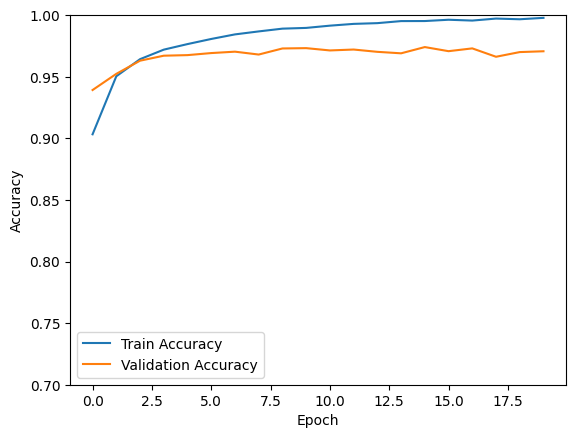

In [13]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0.7, 1.0)
plt.show()


## **Evaluate on Test Set**

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9724


## **Predict Single Image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Label: 2
True Label: 2


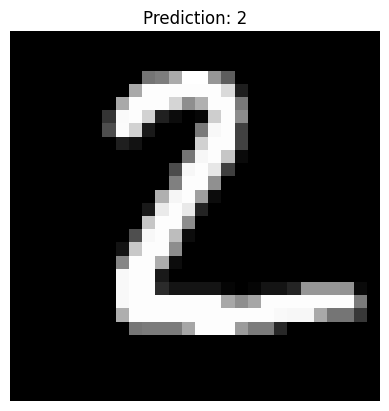

In [16]:
index = 1
prediction = model.predict(x_test[index:index+1])
predicted_label = np.argmax(prediction)

print("Predicted Label:", predicted_label)
print("True Label:", y_test[index])

plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Prediction: {predicted_label}")
plt.axis('off')
plt.show()


In [17]:
model.save("mnist_model.h5")
print("Model saved!")

Model saved!
